In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [122]:
my_dataset = pd.read_csv("Current.csv")
my_dataset

,Number,Longitude,Latitude
0,1,-68.892899,-37.748128
1,2,-68.894667,-37.748848
2,3,-68.893995,-37.751500
3,4,-68.890361,-37.757180
4,5,-68.930286,-37.749486
...,...,...,...
225,226,-69.102244,-37.752478
226,227,-68.789131,-37.527982
227,228,-68.685476,-37.487702
228,229,-68.570543,-37.567725


In [123]:
my_dataset.columns


Index(['Number', 'Longitude', 'Latitude'], dtype='object')

In [124]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Number     230 non-null    int64  
 1   Longitude  230 non-null    float64
 2   Latitude   230 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.5 KB


In [125]:
my_dataset.describe()

,Number,Longitude,Latitude
count,230.000000,230.000000,230.000000
mean,115.500000,-69.655231,-38.055918
std,66.539462,0.848987,1.970251
min,1.000000,-71.314312,-42.909528
25%,58.250000,-70.567388,-39.918395
50%,115.500000,-69.367783,-37.717678
75%,172.750000,-68.932342,-36.464157
max,230.000000,-68.300000,-34.190063


In [126]:
my_dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
225    False
226    False
227    False
228    False
229    False
Length: 230, dtype: bool

In [127]:
my_dataset.duplicated().sum()

0

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
my_dataset.Longitute = LabelEncoder().fit_transform(my_dataset.Longitude)
my_dataset.Latitude = LabelEncoder().fit_transform(my_dataset.Latitude)
my_dataset.answer_in_fact = LabelEncoder().fit_transform(my_dataset.Latitude)
my_dataset

C:\Users\User\AppData\Local\Temp\ipykernel_9572\2333257718.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  my_dataset.Longitute = LabelEncoder().fit_transform(my_dataset.Longitude)
C:\Users\User\AppData\Local\Temp\ipykernel_9572\2333257718.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  my_dataset.answer_in_fact = LabelEncoder().fit_transform(my_dataset.Latitude)


,Number,Longitude,Latitude
0,1,-68.892899,105
1,2,-68.894667,104
2,3,-68.893995,101
3,4,-68.890361,99
4,5,-68.930286,103
...,...,...,...
225,226,-69.102244,100
226,227,-68.789131,142
227,228,-68.685476,145
228,229,-68.570543,141


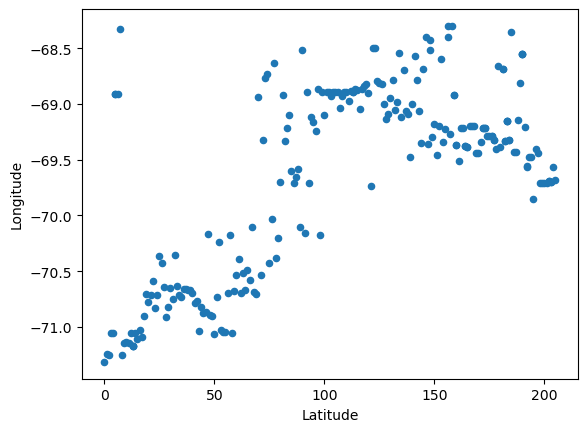

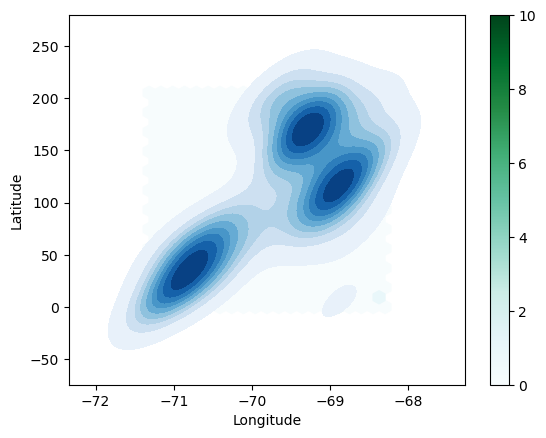

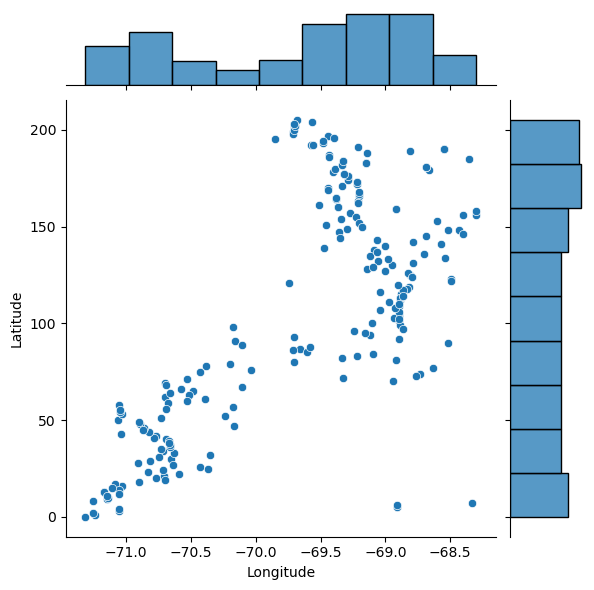

In [130]:
my_dataset.plot(kind = 'scatter', x = 'Latitude', y = 'Longitude')
my_dataset.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=20)
sns.kdeplot(x=my_dataset['Longitude'], y=my_dataset['Latitude'], cmap='Blues', fill=True)
sns.kdeplot(x=my_dataset['Longitude'], y=my_dataset['Latitude'], cmap='Blues', fill=True, levels=10)
sns.jointplot(x=my_dataset['Longitude'], y=my_dataset['Latitude'], kind='scatter')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Number     230 non-null    int64  
 1   Longitude  230 non-null    float64
 2   Latitude   230 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.5 KB


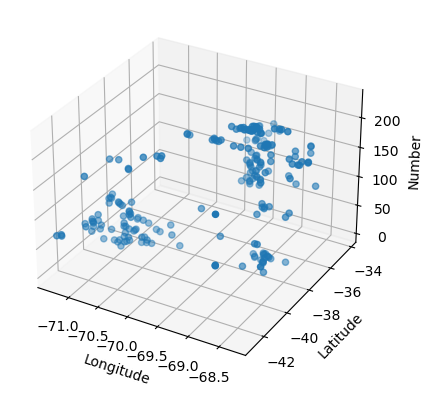

In [131]:
fig = plt.figure()
my_dataset1 = pd.read_csv("Current.csv")
my_dataset1
ax = fig.add_subplot(111, projection='3d')
ax.scatter(my_dataset1['Longitude'], my_dataset1['Latitude'], my_dataset1['Number'])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Number')
my_dataset.info()

In [132]:
# Training and Testing Data
lat = 'Latitude'
y = my_dataset[[lat]]
y

,Latitude
0,105
1,104
2,101
3,99
4,103
...,...
225,100
226,142
227,145
228,141


In [133]:
long = 'Longitude'
x = my_dataset[[long]]
y

,Latitude
0,105
1,104
2,101
3,99
4,103
...,...
225,100
226,142
227,145
228,141


In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train.shape

(172, 1)

In [135]:
y_train.shape

(172, 1)

In [136]:
x_test.shape

(58, 1)

In [137]:
y_test.shape

(58, 1)

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1234)

In [140]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [141]:
model.intercept_

array([3731.70643254])

In [142]:
model.coef_

array([[52.01935221]])

In [143]:
model.score(x_test, y_test)


0.2990162359845894

In [144]:
y_pred = model.predict(x_test)

In [145]:
from sklearn.metrics import mean_absolute_error

In [146]:
mean_abslute_error(y_test, y_pred)

NameError: name 'mean_abslute_error' is not defined